# Lab 3 - Visualization

Last update: 11/11/2023

- Name: Đoàn Ngọc Mai
- Student ID: 21127104

***

## Work and submission guidelines

**Work on your assignment**

- You need to do your assignment directly in this notebook. First, fill out your name and ID at the beginning of the file. In the notebook, fill in places that say:
```python
#TODO
```

- During your work, you can print out the result, create more cells to test, or create more functions to handle things. Please note that <font color=red>you are not allowed to delete or modify my code cells</font> (except in the case that mentioned above). Remember to remove `raise NotImplementedError("not implement")` when running the code.

- Always press `Ctrl + S` in order to save your work.

**Notes:**

    *  Copy means zero
    *  You have to submit your work on time. No exception
    *  Any questions about your grade are based on the assignment submitted on Moodle
    *  Wrong submission takes you -2 points

**Submit your work**

- When grading your assignment, I will choose `Kernel` - `Restart Kernel & Run All Cells` in order to restart the kernel and run all cells in your notebook. Therefore, you should do that before submitting to ensure that the outputs are all as expected.

- After that, rename you notebook with your student ID (e.g. `1234567.ipynb`) and submit on Moodle.

- <font color=red>Please strictly follow the submission rules.</font>

## Abstract and general requirements

**Abstract**

- In this assignment, you are required to visualize data and results. This task is very important since it provides reader (your clients, your boss,...) an overview of the data as well as your results.

- You will visualize the data in order to answer some questions. By answering these questions, you are able to get some insights from data.

- You will also visualize the results of machine learning model to be able to know whether your model works well or not.

**General requirements**

- Every charts **must have their own name, axes name, legends**.
- The charts you draw must not only be correct but also beautiful:
    - The correctness is shown in choosing the right chart and accurately calculating the data to draw the chart.
    - The beauty is expressed in the UI/UX of the chart. The beauty of UI is shown in choosing the colors, layout of the chart. The beauty of UX is reflected in the fact that the reader can easily capture your message conveyed through your notebook.

---

In [75]:
# visialize stuff
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import json
# !pip install geopandas
import geopandas as gpd

# modeling stuff
# !pip install torchvision
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import random

## Data visualization

- In this section, you are going to compute and visualize some information about Covid-19
- The data prepared in `./data` was collected from Worldometer
- Link: https://www.worldometers.info/coronavirus/

In [76]:
# read the data into a dataframe
df = pd.read_csv('./data/data.csv')
print(f'Shape: {df.shape}')
df.head(5)

Shape: (219, 10)


,Country Name,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Critical Cases,Total Tests,Population
0,USA,"31,990,143",NaN,"576,298",NaN,"24,560,856","6,852,989","9,321","420,822,699","332,516,170"
1,India,"13,689,453","+3,380","171,089",NaN,"12,253,697","1,264,667","8,944","259,207,108","1,390,568,032"
2,Brazil,"13,521,409",NaN,"355,031",NaN,"11,957,068","1,209,310","8,318","28,600,000","213,737,070"
3,France,"5,067,216",NaN,"99,135",NaN,"310,934","4,657,147","5,916","70,140,847","65,386,285"
4,Russia,"4,657,883","+8,173","103,601",338.0,"4,281,776","272,506","2,300","124,100,000","145,983,351"


### Requrement #1: Preprocess

- **TODO**: Take a look at the data files, then go to the URL aforementioned, explore the meaning of columns in the dataset and fill in the blanks:
    - Country Name: this column contains the name of different countries.
    - Total Cases: This is the reported total cumulative count of detected and confirmed positive cases. This may also include presumptive, suspect, or probable cases depending on the country's reporting standards​​.
    - New Cases: This indicates the number of new COVID-19 cases reported recently.
    - Total Deaths: The cumulative number of deaths among detected cases​​.
    - New Deaths: This column would typically reference the number of deaths reported within the latest update period.
    - Total Recovered: This represents the total number of people who have recovered from COVID-19 in each country. However, this statistic can be highly variable as reporting can be inconsistent. Some countries count a patient as "recovered" when discharged from the hospital, even without a test​​.
    - Active Cases: This figure represents the current number of people detected and confirmed to be infected with the virus. This calculated as the total cases minus total deaths and recoveries.
    - Critical Cases: This generally represents the number of patients in intensive care units (ICUs), if this figure is reported​​.
    - Total Tests: This represents the total number of COVID-19 tests conducted in each country.
    - Population: The total number of people living in the country.

- Check the data with `info()` function

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     219 non-null    object 
 1   Total Cases      219 non-null    object 
 2   New Cases        46 non-null     object 
 3   Total Deaths     219 non-null    object 
 4   New Deaths       32 non-null     float64
 5   Total Recovered  217 non-null    object 
 6   Active Cases     217 non-null    object 
 7   Critical Cases   146 non-null    object 
 8   Total Tests      210 non-null    object 
 9   Population       219 non-null    object 
dtypes: float64(1), object(9)
memory usage: 17.2+ KB


- You can see that `New Cases`, `New Deaths`, `Critical Cases` have a lot of missing data (at least 33.3%). Therefore, we have to remove these columns.
- Most of data in columns are `object` type, which are not suitable at all. They should be converted to integer.
- `Total Recovered`, `Active Cases` and `Total Tests` only have a few missing values, so we can fill in these missing values with median value of each column.

In [78]:
# TODO: drop New Cases, New Deaths, Critical Cases
# raise NotImplementedError('not implemented')
df = df.drop(columns=['New Cases', 'New Deaths', 'Critical Cases'])
# check the result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country Name     219 non-null    object
 1   Total Cases      219 non-null    object
 2   Total Deaths     219 non-null    object
 3   Total Recovered  217 non-null    object
 4   Active Cases     217 non-null    object
 5   Total Tests      210 non-null    object
 6   Population       219 non-null    object
dtypes: object(7)
memory usage: 12.1+ KB


In [79]:
# TODO: convert data to integer. if the converter returns error, leave it a None
# raise NotImplementedError('not implemented')
def convert_to_int(column):
    try:
        # Remove commas and convert to integer
        return pd.to_numeric(column.str.replace(',', ''), errors='coerce')
    except:
        # If there is any error, return None (NaN in pandas)
        return np.nan

for column in ['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases', 'Total Tests', 'Population']:
    df[column] = convert_to_int(df[column])
# check the result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     219 non-null    object 
 1   Total Cases      219 non-null    int64  
 2   Total Deaths     204 non-null    float64
 3   Total Recovered  217 non-null    float64
 4   Active Cases     217 non-null    float64
 5   Total Tests      210 non-null    float64
 6   Population       219 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 12.1+ KB


**TODO**: We did handle missing value before. Why do we still have missing values here?

The presence of missing values in DataFrame even after dropping specific columns indicates that the missing values exist in other columns that we have retained in the DataFrame. In our case, the columns Total Recovered, Active Cases, and Total Tests still contain missing values.
+ Incomplete Data Entry: The source data may have incomplete entries, which results in missing values.
+ Different Columns with Missing Values: The missing values are not only in the columns we dropped `New Cases`, `New Deaths`, `Critical Cases`. Instead, they are also present in `Total Recovered`, `Active Cases`, and `Total Tests`, which you did not drop.

In [80]:
# TODO: fill in the missing data with median value
# raise NotImplementedError('not implemented')
for column in df.columns:
    if df[column].dtype == float or df[column].dtype == int:
        df[column].fillna(df[column].median(), inplace=True)

# check the result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     219 non-null    object 
 1   Total Cases      219 non-null    int64  
 2   Total Deaths     219 non-null    float64
 3   Total Recovered  219 non-null    float64
 4   Active Cases     219 non-null    float64
 5   Total Tests      219 non-null    float64
 6   Population       219 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 12.1+ KB


**TODO**: Why do we have `float64` here?

About the float64 data type, it seems that after the conversion to numeric types using `pd.to_numeric`, the columns that were originally of object type are now represented as float64 in the DataFrame. This is because the `errors='coerce'` parameter in pd.to_numeric converts any non-numeric values to NaN. The subsequent call to `fillna` with the median value also converts the columns to float type.

In [81]:
# TODO: save your new data frame to `./data/new_data.csv`
# raise NotImplementedError('not implemented')
df.to_csv('./data/new_data.csv',index=False)

In [82]:
# TEST
file = open('./data/new_data.csv', 'r')
new_data = file.read()
file.close()

file = open('./data/correct_data.csv', 'r')
correct_data = file.read()
file.close()

assert new_data == correct_data

### Requirement #2: Visualize single variable

- For now, if you do not pass the test, you have to work on the correct file by un-commenting the cell code below to read the `./data/correct_data.csv` into `df`
- You are going to draw 6 bar charts which show all the fields of dataset. For each bar chart, sort the values of countries in descending order and only visualize 5 countries

In [83]:
# # un-comment these lines of code
df = pd.read_csv('./data/correct_data.csv')

df.head()

,Country Name,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Tests,Population
0,USA,31990143,576298.0,24560856.0,6852989.0,420822699.0,332516170
1,India,13689453,171089.0,12253697.0,1264667.0,259207108.0,1390568032
2,Brazil,13521409,355031.0,11957068.0,1209310.0,28600000.0,213737070
3,France,5067216,99135.0,310934.0,4657147.0,70140847.0,65386285
4,Russia,4657883,103601.0,4281776.0,272506.0,124100000.0,145983351


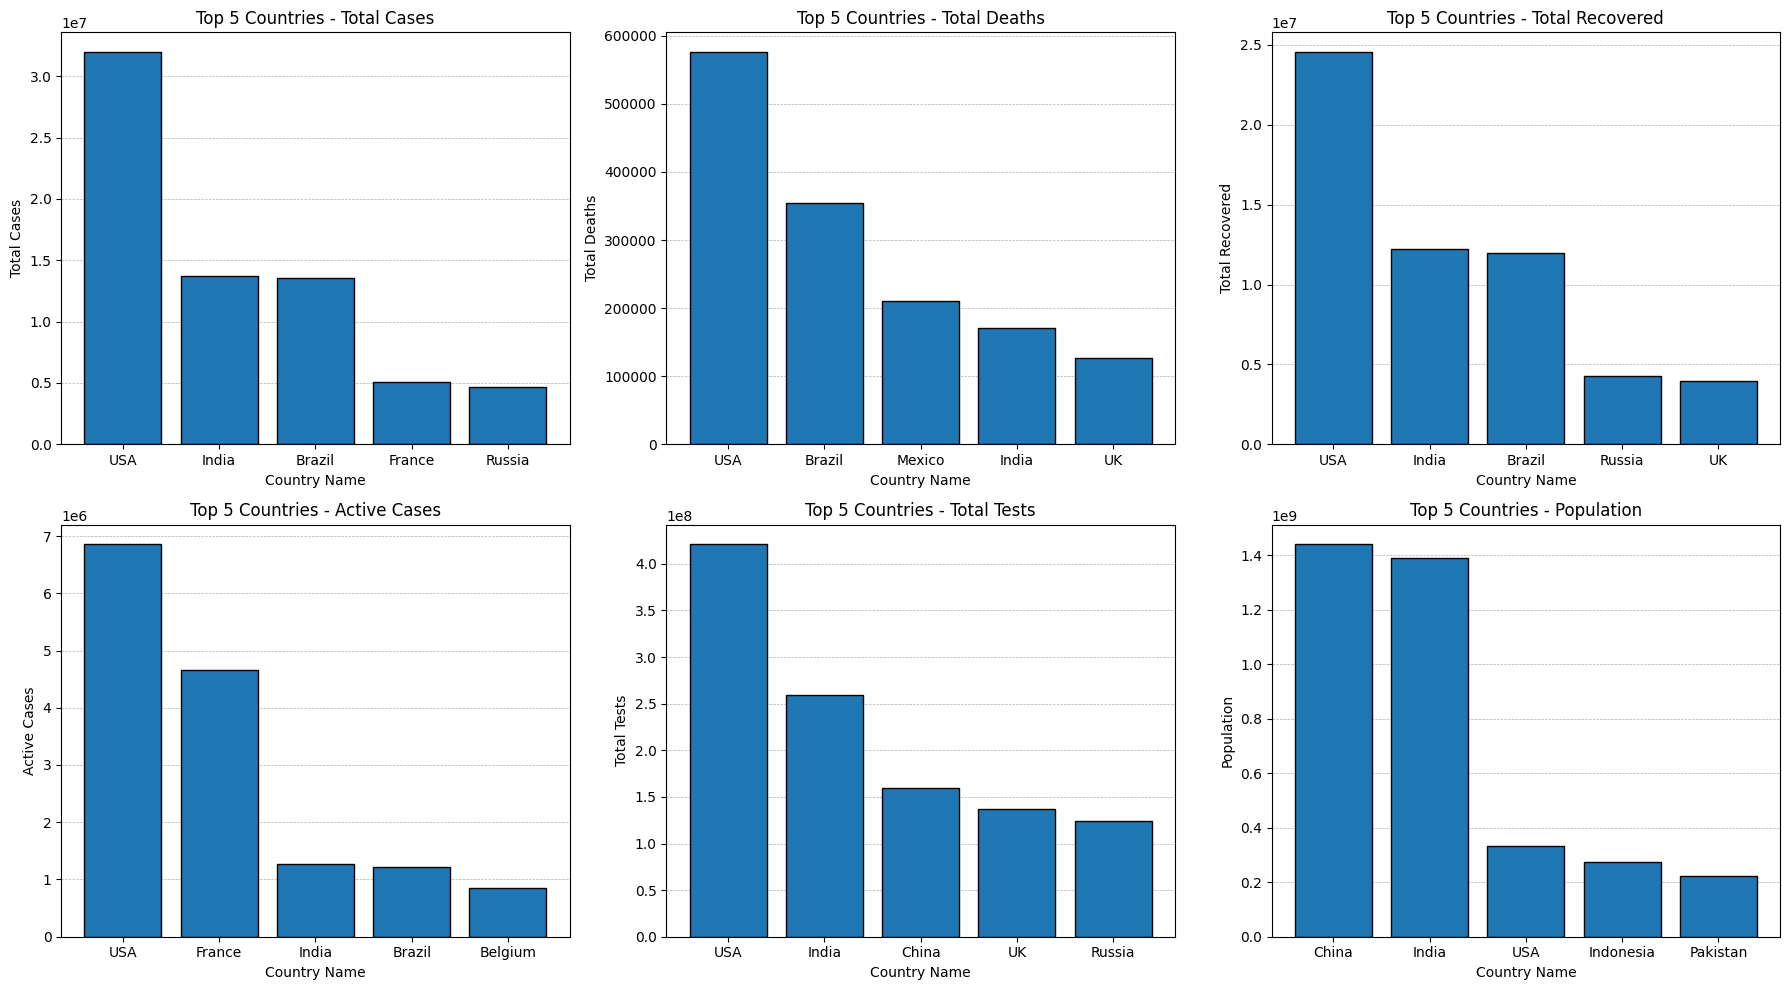

In [84]:
# TODO: draw 6 bar charts
# raise NotImplementedError('not implemented')
fields = ['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases', 'Total Tests', 'Population']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

axes = axes.flatten()

for i, field in enumerate(fields):
    # Sort the DataFrame by the selected field in descending order
    sorted_df = df.sort_values(by=field, ascending=False).head(5)
    
    bars = axes[i].bar(sorted_df['Country Name'], sorted_df[field], edgecolor='black')
    
    # Set the grid to be behind bars
    axes[i].set_axisbelow(True)
    
    # Add horizontal grid lines only on the y-axis
    axes[i].yaxis.grid(True, linestyle='--', linewidth=0.5)
    axes[i].xaxis.grid(False)
    
    axes[i].set_title(f'Top 5 Countries - {field}')
    axes[i].set_xlabel('Country Name')
    axes[i].set_ylabel(field)

plt.tight_layout()

plt.show()

**TODO**: Comment about the chart

The charts present comparative data for the top 5 countries across various COVID-19 related metrics:

1. **Total Cases**: The USA leads by a significant margin, followed by India, Brazil, France, and Russia.
2. **Total Deaths**: Again, the USA has the highest count, with Brazil, Mexico, India, and the UK following.
3. **Total Recovered**: The USA has the most recoveries, followed by India, Brazil, Russia, and the UK, which has significantly fewer recoveries compared to the others.
4. **Active Cases**: The USA has the highest number of active cases, then France, India, Brazil, and Belgium.
5. **Total Tests**: The USA has conducted the most tests, with India, China, the UK, and Russia trailing.
6. **Population**: China and India have the largest populations, with the USA, Indonesia, and Pakistan having considerably smaller populations.

In conclusion, The USA appears to be the most affected across all metrics except population size, where China and India are the most populous.

### Requirement #3: Draw world map

- Using bar chart just gives you a little bit information about numbers
- In this requirement, you are going to draw a world map with circles which shows the number of cases for each country. Specifically, you are provided a file named `coord.json` that contains longitude and latitude of each country. You are going to use `Total cases` and `Total Death` to draw the following charts

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16688\3461716708.py:24: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


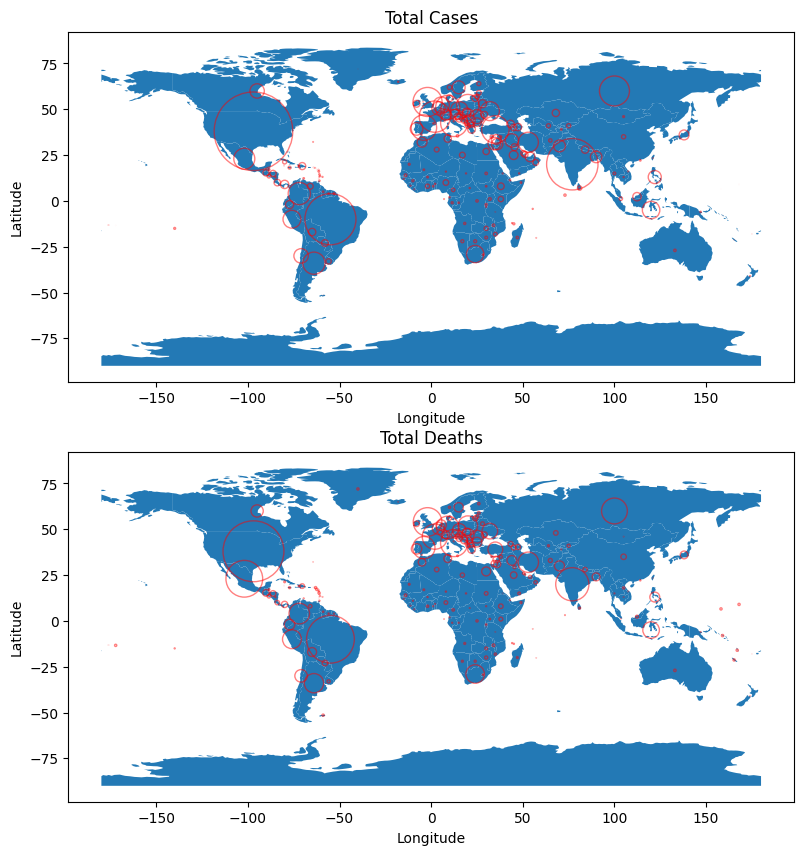

In [85]:
# TODO: draw 2 world map chart using geopandas
# raise NotImplementedError('not implemented')

correct_data_df = pd.read_csv('./data/correct_data.csv')

with open('./data/coord.json') as f:
    coord_data = json.load(f)

coord_df = pd.DataFrame(list(coord_data['lat'].items()), columns=['Country Name', 'Latitude'])

# Add a 'Longitude' column to 'coord_df' by mapping the 'long' values from 'coord_data'
coord_df['Longitude'] = coord_df['Country Name'].map(coord_data['long'])

# Merge 'correct_data_df' and 'coord_df' DataFrames on the 'Country Name' column
merged_df = correct_data_df.merge(coord_df, on='Country Name')

gdf_cases = gpd.GeoDataFrame(
    merged_df,
    geometry=gpd.points_from_xy(merged_df['Longitude'], merged_df['Latitude'])
)

fig, ax = plt.subplots(2, 1, figsize=(20, 10))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# For Total Cases
world.plot(ax=ax[0], color='#2379b5')
scatter_cases = gdf_cases.plot(ax=ax[0], color='none', edgecolor='red', markersize=gdf_cases['Total Cases'] / 10000, alpha=0.5)
ax[0].set_title('Total Cases')
ax[0].set_xlabel('Longitude')  
ax[0].set_ylabel('Latitude')  

# For Total Deaths
world.plot(ax=ax[1], color='#2379b5')
scatter_deaths = gdf_cases.plot(ax=ax[1], color='none', edgecolor='red', markersize=gdf_cases['Total Deaths'] / 300, alpha=0.5)
ax[1].set_title('Total Deaths')
ax[1].set_xlabel('Longitude')  
ax[1].set_ylabel('Latitude')  

plt.show()

**TODO**: Comment about the chart

+ The charts in the image present a stark visual representation of the global impact of COVID-19 in terms of total cases and total deaths. Each bubble’s size is proportional to the data it represents, which allows for an immediate visual comparison between different countries and regions.
    + For the *Total Cases* chart, we see a high concentration of large bubbles over regions like North America, South America, parts of Europe, and India, indicating a higher number of reported cases. The dense clustering of circles in these areas not only highlights the widespread nature of the pandemic but also emphasizes the heavy burden of cases in these specific regions.
    + In the *Total Deaths* chart, the bubbles are generally smaller, which corresponds to the lower absolute numbers compared to total cases, but the distribution pattern remains somewhat similar. This indicates that regions with a high number of cases also suffer from a high number of deaths. However, it's noteworthy that some regions show relatively larger bubbles in the deaths chart compared to the cases chart, which could suggest a higher mortality rate or a more severe impact of the pandemic in terms of fatalities.
    + The choice of red for the bubbles is evocative, as the color is often associated with danger or urgency, which fits the context of a health crisis. Moreover, these types of visualizations are useful for quickly conveying the geographical spread and impact of a pandemic like COVID-19. They can highlight areas with high infection rates or death tolls, which may indicate regions that require more resources or stricter containment measures. The blue base map provides a neutral background that allows the red bubbles to stand out, making the data the focal point of the presentation. 
+ Overall, the visual impact of the charts is strong; they convey the seriousness of the pandemic and highlight the global inequalities in its spread and mortality. The use of proportional symbols (bubbles) is an effective way to communicate complex data in a way that is accessible and immediately understandable.


### Requirement #4: Relationship between 2 variables

- Exploring the relationship between variables is a needed task to do
- You will start with exploring the linear relationship between 2 variables. In order to do so, draw $C_6^2=15$ scatter plots. For each plot, draw a line that shows the linear relationship of variables. You should implement the line yourself instead of using library.

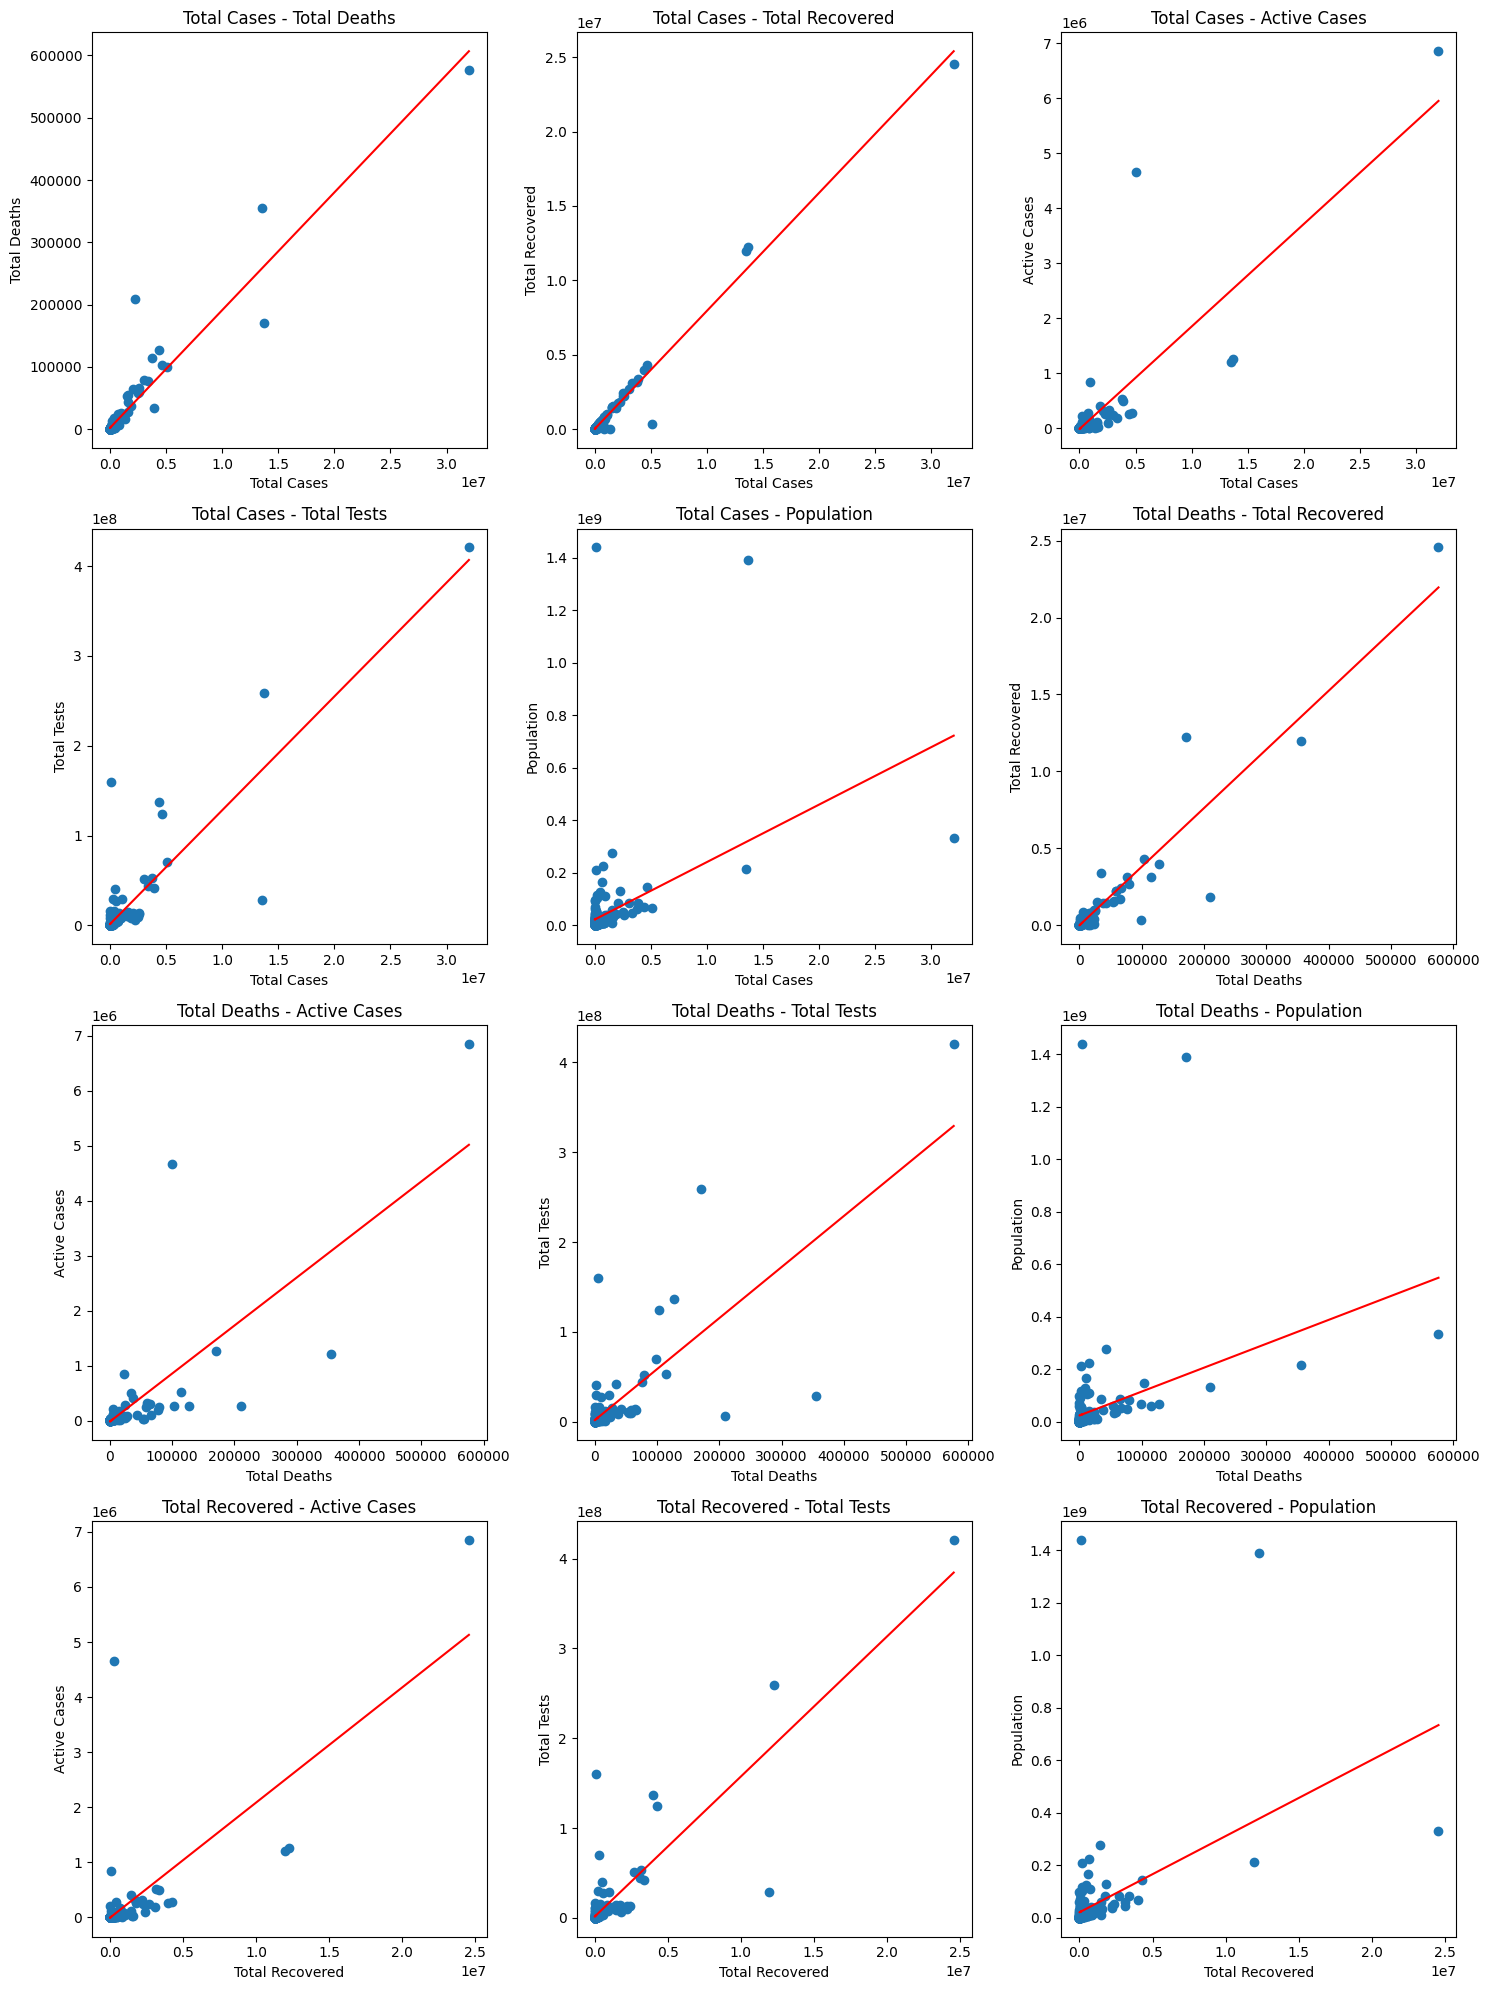

In [86]:
# TODO: scatter stuff
# raise NotImplementedError('not implemented')

# Extract relevant columns for analysis
selected_columns = ['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases', 'Total Tests', 'Population']
selected_df = df[selected_columns]

def plot_linear_relationship(ax, x, y, xlabel, ylabel):
    ax.scatter(x, y)
    # Calculate the slope (m) and intercept (b) for the linear regression line
    m, b = np.polyfit(x, y, 1)

    ax.plot(x, m * x + b, color='red')
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    ax.set_title(f"{xlabel} - {ylabel}")

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
axes = axes.flatten() 

variables = selected_df.columns
plot_idx = 0  

for i in range(len(variables)):
    for j in range(i + 1, len(variables)):
        if plot_idx < len(axes):  
            x = selected_df[variables[i]]
            y = selected_df[variables[j]]
            plot_linear_relationship(axes[plot_idx], x, y, variables[i], variables[j])
            plot_idx += 1
        else:
            break  # Break out of the loop if plot_idx exceeds the length of axes

plt.tight_layout()
plt.show()

**TODO**: As showed above, give your prediction about the relationship between each pair.
+ *Total Cases - Total Deaths:* There is a positive correlation suggesting that as the total number of cases increases, the total deaths also increase. This is an expected relationship as more cases generally mean more deaths, assuming the case fatality rate remains somewhat constant.
+ *Total Cases - Total Recovered:* This also shows a positive correlation indicating that places with more cases also tend to have more recoveries, which would make sense as the number of recoveries would naturally grow with the number of cases over time.
+ *Total Cases - Active Cases:* Another positive correlation is observed here. The more total cases there are, the higher the number of active cases, though this relationship may vary depending on how long the virus has been present in the population and the recovery rate.
+ *Total Cases - Total Tests:* There is a positive correlation indicating that as the total number of cases increases, the total tests conducted also increase. This is likely because more tests are done as the virus spreads to identify and isolate infected individuals.
+ *Total Cases - Population:* There seems to be a positive correlation, suggesting that larger populations have more total cases. This could be due to the higher number of people among whom the virus can spread.
+ *Total Deaths - Total Recovered:* A positive correlation is noted, which may seem counterintuitive. However, both metrics are likely to increase with the total number of cases.
+ *Total Deaths - Active Cases:* The relationship is not very clear, but there seems to be a slight positive trend, which would imply that as deaths rise, so do active cases. This could be dependent on many factors, including the stage of the pandemic and the response measures in place.
+ *Total Deaths - Total Tests:* There is a positive correlation here, which could suggest that as more tests are conducted, more deaths are reported. This may not be a causal relationship but rather a function of better reporting and case identification as testing increases.
+ *Total Deaths - Population:* A positive correlation is observed, which could imply that larger populations see more deaths, which would be expected as the number of people affected by the virus increases with population size.
+ *Total Recovered - Active Cases:* The relationship is not strongly evident, but there might be a slight positive trend. The number of recovered cases doesn't necessarily move in tandem with active cases since these are affected by different stages of the disease's timeline.
+ *Total Recovered - Total Tests:* There appears to be a positive correlation. As testing increases, the number of recovered cases also increases, possibly because more cases are being identified and can then be resolved.
+ *Total Recovered - Population:* There is a positive correlation. Larger populations might have a greater number of recovered cases after having more cases in total.

### Requirement #5: Double check the relationship between 2 variables

- In order to make sure about the linear relationship, you have to check each pair with **Pearson correlation coefficient**
- Specifically, $\rho$ is calculated as follows:

$$\rho_{X, Y} = \frac{cov(X, Y)}{\sigma_X \sigma_Y}$$

- Then, plot these 15 values using heatmap

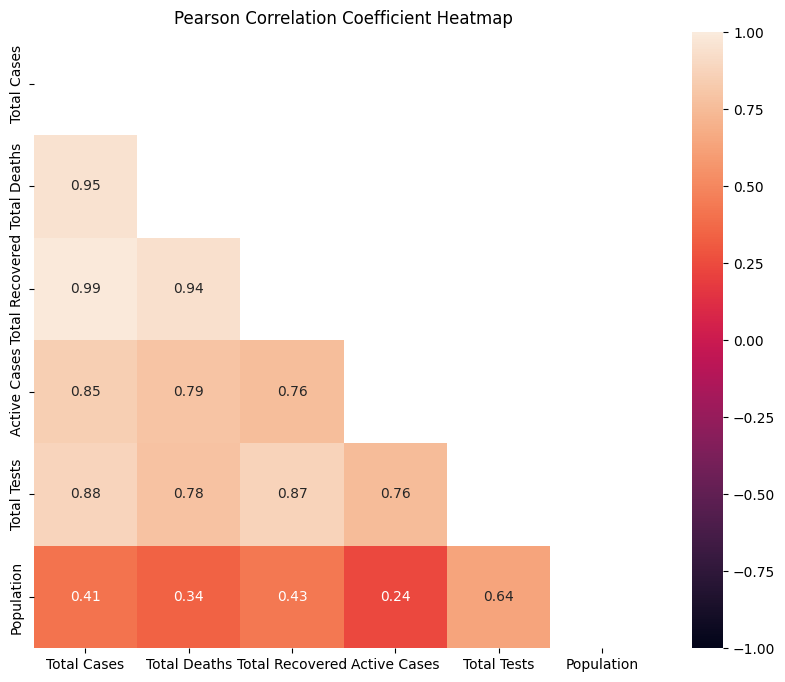

In [87]:
# TODO: create heatamp
# raise NotImplementedError('not implemented')
correlation_matrix = selected_df.corr()
matrix = np.triu(correlation_matrix)
plt.figure(figsize=(10, 8))
sn.heatmap(correlation_matrix,vmin =-1, vmax=1, mask=matrix, annot=True, fmt=".2f", xticklabels=selected_columns, yticklabels=selected_columns)
plt.title("Pearson Correlation Coefficient Heatmap")
plt.show()

For now, you can check whether your prediction is right or wrong!

## Model visualization

- In this section, we are going to visualize the training and testing process of machine learning model
- The process of training and testing a model is as follow:
    1. Prepare data for training and testing
    2. Create a model
    3. Train and test the model
    4. Visualize the result

- You are required to:
    1. Study Multi-layer neural network and Convolutional neural network
    2. Study `Pytorch` in order to prepare data and design machine learning model
    3. Design 2 models to classify MNIST dataset. Then, visualize the result of each model and compare the result to each other
        - Model 1: A fully-connected model with 4 layers. The input layer has $784$ neurons. The hidden layer #1 has $1024$ neurons, which is followed by a $ReLU$ as activation functions. The hidden layer #2 has $512$ neurons, also followed by a $ReLU$ as activation functions. The output layer has $10$ neurons (of course), which follows by a $LogSoftmax$ function
        - Model 2: A CNN model with 2 Convolution layers and 1 linear layer. All the CNN layers have 20 filters, kernel size equal to $5$. Each of them is followed by a $ReLU$ activation function and a MaxPooling2D layer ($kernel\_size=2$). The linear layer is followed by a $LogSoftmax$ activation function

- Google Colab can be used since it provides free GPU, which makes your training and testing process faster

### Requirement #6: Prepare data

- `Pytorch` supports a lot of datasets for running machine learning model. In this lab, we use MNIST dataset. So, download the training set and the testing set using `Pytorch` and store them in `./data`
- Note that you have to transform your data into `tensor` (a datatype that's quite similar to `numpy array`) so you can input to model
- After that, create `train_dataloader` and `test_dataloader`

**TODO**: Explain why we have to create dataloader
+ Dataloaders are essential for efficient machine learning model training because they enable batch processing, shuffling for unbiased learning, parallelization for faster training, and seamless integration of data transformations, ensuring compatibility with the training loop.
    + *Batch Processing:* Dataloaders allow you to process your data in batches. Instead of loading the entire dataset into memory, which may not fit for large datasets, you load a small batch at a time. This reduces memory requirements and allows for efficient training on both CPUs and GPUs.
    + *Shuffling:* During training, it's common to shuffle the data in each epoch. Shuffling helps in preventing the model from learning the order of the data, which can be useful in avoiding biases introduced by the order of the dataset.
    + *Parallelization:* Dataloaders can automatically parallelize data loading, which is beneficial for performance. This is particularly useful when using GPUs, as it allows the model to train on one batch while loading the next.
    + *Data Transformation:* Dataloaders can apply data transformations on-the-fly. For example, converting images to tensors, normalizing pixel values, or applying augmentation techniques. This ensures that the data fed to the model is in the expected format.
    + *Compatibility with Training Loop:* Dataloaders seamlessly integrate with the training loop, allowing you to iterate through the dataset in a structured manner. This compatibility is crucial for efficient model training and evaluation.

In [88]:
# TODO: download training, testing data and store them into training_data and testing_data
# Then, create train_dataloader and test_dataloader with batch_size=32
# raise NotImplementedError('not implemented')

training_data = datasets.MNIST(
    root="./data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="./data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=True)

- After downloading the data, visualize 10 random samples (2 rows, 5 samples for each row) from training set.

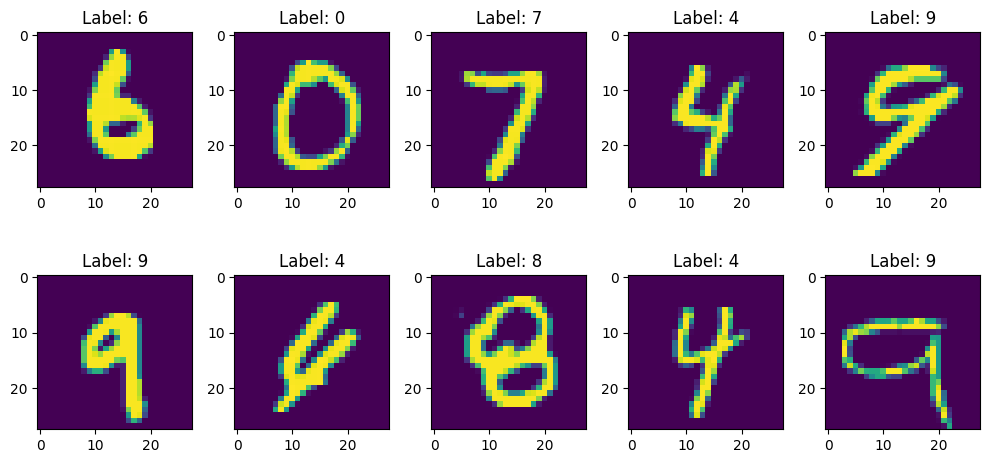

In [89]:
# TODO: visualize 10 random samples
# raise NotImplementedError('not implemented')

def visualize_samples(dataloader, num_samples=10, num_rows=2, num_cols=5):
    indices = np.random.randint(0, len(dataloader.dataset), num_samples)
    samples = [dataloader.dataset[i] for i in indices]
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 5))
    axs = axs.flatten()

    for i, (image, label) in enumerate(samples):
        axs[i].imshow(image.squeeze())
        axs[i].set_title(f"Label: {label}")

    plt.tight_layout()
    plt.show()

visualize_samples(train_dataloader, num_samples=10, num_rows=2, num_cols=5)

### Requirement #7: Create models

- Create 2 models as mentioned above. Call them `Mnist_FC` and `Mnist_CNN`
- **I strongly recommend that you should slowly implement, print out the output and its shape of each layer in order to get a deep understanding of what you are trying to do**
- Before moving to the next requirement, you should test your model with a random sample of the dataset. In case you create code cells for testing, remember to remove these cells

In [90]:
# TODO: create Mnist_FC and Mnist_CNN
# raise NotImplementedError('not implemented')
class Mnist_CNN(torch.nn.Module):
    def __init__(self):
        super(Mnist_CNN, self).__init__()
        self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1, padding=0)
        self.conv2 = torch.nn.Conv2d(in_channels=20, out_channels=20, kernel_size=5, stride=1, padding=0)
        self.maxpool = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        self.linear = torch.nn.Linear(4 * 4 * 20, 10)  
        self.relu = torch.nn.ReLU()
        self.logsoftmax = torch.nn.LogSoftmax(dim=1)  

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = x.view(x.size(0), -1)  # Flatten the tensor for the linear layer
        x = self.linear(x)
        return self.logsoftmax(x)

class Mnist_FC(torch.nn.Module):
    def __init__(self):
        super(Mnist_FC, self).__init__()
        self.fc1 = torch.nn.Linear(784, 1024)
        self.fc2 = torch.nn.Linear(1024, 512)
        self.fc3 = torch.nn.Linear(512, 10)  
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 784)  # Flatten the image
        x = self.relu(self.fc1(x))  # First layer
        x = self.relu(self.fc2(x))  # Second layer
        x = self.fc3(x)             # Output layer
        return x

### Requirement #8: Train and test models

- Design `train` and `test` function with the parameters provided in the following code cell
    - `train` function trains the model with all the data in training set
    - `test` function tests the model with all data in testing set

- Return the accuracy (e.g. $0.847351$) after training and testing

**TODO**: Explain the parameters of `train` and `test` function. In `test` function, there is a line of code that says `with torch.no_grad()`. Why do we have this line of code?
+ **Parameters for `train` function:**
    + *dataloader:* An iterable that provides batches of the dataset. It combines a dataset and a sampler and provides an iterable over the given dataset.
    + *model:* The neural network model that you want to train.
    + *loss_fn:* The loss function that measures how well the model performs. It compares the model's predictions with the actual labels.
    + *optimizer:* The optimization algorithm used to update the weights of the model in the direction that minimizes the loss.
-> During the training process, the model's weights are updated in the direction that reduces the loss. This involves calculating the gradients of the loss with respect to the weights, which is done in the backpropagation step with loss.backward(). After calculating the gradients, optimizer.step() is called to adjust the weights.

+ **Parameters for test function:**
    + *dataloader:* Similar to the train function, it provides batches of the dataset, but this time it is usually the unseen test dataset.
    + *model:* The neural network model that you want to evaluate.
-> The test function doesn't require the loss function or the optimizer because we are only passing data through the model to get predictions, not updating weights or calculating gradients.

+ **Explanation about `with torch.no_grad()` :**
    + This line of code is used to disable gradient calculation in the code block. During training, PyTorch keeps track of all operations that have gradients that need to be computed. This is necessary for backpropagation. However, during testing, we don't need to compute gradients, as we're not updating weights. Disabling gradient calculation `with torch.no_grad()`:
    + Reduces memory usage because gradients are not stored.
    + Speeds up computations since it avoids performing unnecessary calculations.
    + Ensures that the model is not accidentally updated during evaluation, which is important for getting a true measure of the model's performance on the test data.
    + Using `torch.no_grad()` tells PyTorch that we do not intend to call `Tensor.backward()` on the tensors created inside the block, which is appropriate during testing since we only want to forward propagate through the network.

In [91]:
# TODO: design train and test function

# check gpu
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f'Using {device} for training and testing')

def train(dataloader, model, loss_fn, optimizer):
    model.train()
    total_loss, correct, total = 0, 0, 0
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)
        total_loss += loss.item()

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        correct += (pred.argmax(1) == y).type(torch.float).sum().item()
        total += y.size(0)

    return correct / total

def test(dataloader, model):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            total += y.size(0)

    return correct / total

Using cpu for training and testing


- Run 20 epochs for each model. In order to do so, at fist, you have to define `learning_rate, loss_fn` and `optimizer`. I will help you on that

- Save the history of training and testing process as `history_fc` and `history_cnn`. During the running process, you should print out the accuracy in order to keep track

- The history is a dictionary with the following structure:

```python
history = {
    1: [0.6, 0.5], # the key (type: int) is the epoch
    2: [0.7, 0.6], # the value (type: list) contains the accuracy of training and testing process at the corresponding epoch
    ...
}
```

**TODO**: List out some loss functions and optimizers that you have heard about

+ **Loss Functions:**
    + *Cross-Entropy Loss (Log Loss):* This is often used for classification problems. For binary classification, it's known as Binary Cross-Entropy, and for multi-class classification tasks, it's called Categorical Cross-Entropy.
    + *Mean Squared Error (MSE):* Typically used for regression problems. It measures the average squared difference between the estimated values and the actual value.
    + *Mean Absolute Error (MAE):* Also used for regression, MAE measures the average magnitude of the errors in a set of predictions, without considering their direction.
    + Hinge Loss: Often used for "maximum-margin" classification, most notably for support vector machines.
+ **Optimizers:**
    + *Stochastic Gradient Descent (SGD):* This is a simple yet very efficient approach to fitting linear classifiers and convex functions.
    + *Momentum:* It is a method that helps accelerate SGD in the relevant direction and dampens oscillations. It does this by adding a fraction of the update vector of the past step to the current update vector.
    + *RMSprop:* This optimizer divides the learning rate for a weight by a running average of the magnitudes of recent gradients for that weight.
    + *Adam (Adaptive Moment Estimation):* It combines the advantages of two other extensions of stochastic gradient descent. Namely, Adaptive Gradient Algorithm (AdaGrad) and Root Mean Square Propagation (RMSProp).
    + *AdamW:* This is an extension of Adam that includes weight decay fix, more suitable for deep learning.
    + *Nadam (Nesterov-accelerated Adaptive Moment Estimation):* It combines the RMSprop with Nesterov momentum.


In [92]:
# define model

loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-3


# TODO: run 20 epochs for Mnist_FC and Mnist_CNN
# raise NotImplementedError('not implemented')

num_epochs = 20
history_fc = {}
history_cnn = {}

# For Mnist_FC
print("========== FC model ==========")
model_fc = Mnist_FC().to(device)
optimizer_fc = torch.optim.SGD(model_fc.parameters(), lr=learning_rate)

for epoch in range(1, num_epochs + 1):
    print(f"\nEpoch {epoch}\n-------------------------------")
    train_accuracy_fc = train(train_dataloader, model_fc, loss_fn, optimizer_fc)
    test_accuracy_fc = test(test_dataloader, model_fc)  # Remove loss_fn here
    history_fc[epoch] = [train_accuracy_fc, test_accuracy_fc]
    print(f"Training acc: {train_accuracy_fc:.3f}")
    print(f"Testing acc: {test_accuracy_fc:.3f}")

# For Mnist_CNN
print("\n========== CNN model ==========")
model_cnn = Mnist_CNN().to(device)
optimizer_cnn = torch.optim.SGD(model_cnn.parameters(), lr=learning_rate)

for epoch in range(1, num_epochs + 1):
    print(f"\nEpoch {epoch}\n-------------------------------")
    train_accuracy_cnn = train(train_dataloader, model_cnn, loss_fn, optimizer_cnn)
    test_accuracy_cnn = test(test_dataloader, model_cnn)  # Use model_cnn here
    history_cnn[epoch] = [train_accuracy_cnn, test_accuracy_cnn]
    print(f"Training acc: {train_accuracy_cnn:.3f}")
    print(f"Testing acc: {test_accuracy_cnn:.3f}")

========== FC model ==========

Epoch 1
-------------------------------
Training acc: 0.388
Testing acc: 0.666

Epoch 2
-------------------------------
Training acc: 0.706
Testing acc: 0.740

Epoch 3
-------------------------------
Training acc: 0.755
Testing acc: 0.796

Epoch 4
-------------------------------
Training acc: 0.809
Testing acc: 0.835

Epoch 5
-------------------------------
Training acc: 0.839
Testing acc: 0.854

Epoch 6
-------------------------------
Training acc: 0.857
Testing acc: 0.868

Epoch 7
-------------------------------
Training acc: 0.869
Testing acc: 0.880

Epoch 8
-------------------------------
Training acc: 0.878
Testing acc: 0.887

Epoch 9
-------------------------------
Training acc: 0.884
Testing acc: 0.892

Epoch 10
-------------------------------
Training acc: 0.889
Testing acc: 0.894

Epoch 11
-------------------------------
Training acc: 0.893
Testing acc: 0.899

Epoch 12
-------------------------------
Training acc: 0.896
Testing acc: 0.901

Epoch

### Requirement #9: Visualize

- Produce a graph as the following code cell and comment about the running process of 2 models

**TODO**: Your comment
+ **Visualization Considerations:**
    + The choice of a line graph is appropriate for showing the trend of accuracy over epochs.
    + Side-by-side subplots allow for easy comparison between the two models.
    + Including grid lines helps in estimating the values at various points more easily.
+ **Comment On Graphs:**
    + *Training Accuracy:* Both models show a rapid increase in training accuracy during the initial epochs, which starts to plateau as the epochs increase. This indicates that the models are effectively learning from the training data. The FC model shows a very steep initial learning curve, suggesting that it is quickly capturing the patterns in the dataset.
    + *Testing Accuracy:* The testing accuracy for both models follows a similar trend to the training accuracy, which is indicative of good generalization. The CNN model demonstrates marginally higher testing accuracy compared to the FC model, which is expected since CNNs are typically better suited for image-related tasks due to their ability to capture spatial hierarchies in data.
    + *Overfitting:* There does not seem to be a significant gap between the training and testing accuracy for either model, which suggests that overfitting is not a major issue in this case. Both models generalize well to unseen data.
    + *Convergence:* By the end of the 20 epochs, both models appear to have converged, as indicated by the leveling off of the accuracy curves. The marginal gains in later epochs are minimal, suggesting that running additional epochs may not lead to substantial improvements.
    + *Comparison Between Models:* The CNN model performs slightly better than the FC model, which aligns with common knowledge about the effectiveness of CNNs in image classification tasks. However, the difference is not very large, indicating that the FC model is also a strong baseline for this dataset.


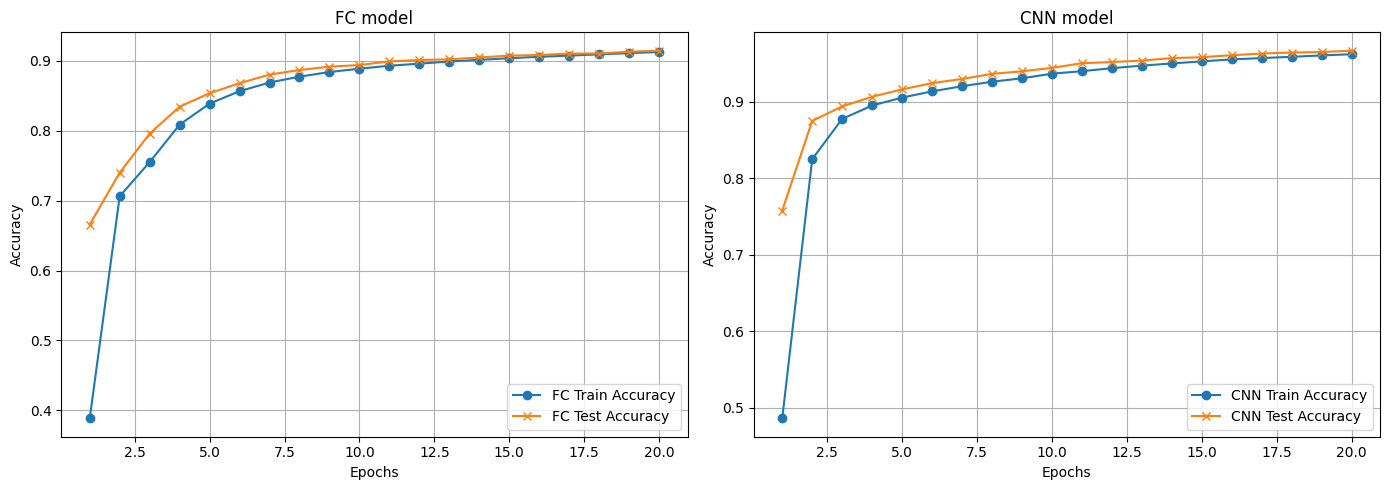

In [93]:
# TODO: visualize the history
# raise NotImplementedError('not implemented')
epochs = range(1, num_epochs + 1)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

axes[0].plot(epochs, [history_fc[e][0] for e in epochs], label='FC Train Accuracy', marker='o')
axes[0].plot(epochs, [history_fc[e][1] for e in epochs], label='FC Test Accuracy', marker='x')
axes[0].set_title('FC model')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(epochs, [history_cnn[e][0] for e in epochs], label='CNN Train Accuracy', marker='o')
axes[1].plot(epochs, [history_cnn[e][1] for e in epochs], label='CNN Test Accuracy', marker='x')
axes[1].set_title('CNN model')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

- Highly recommend you go play around with the parameters of models and re-implement 2 models using `TensorFlow` on Colab